# MRI and TSV preprocessing 

## Imports

The data will be processed using 

In [2]:
import os       # using operating system dependent functionality (folders)
import glob
import pandas as pd # data analysis and manipulation
import numpy as np    # numerical computing (manipulating and performing operations on arrays of data)
import copy     # Can Copy and Deepcopy files so original file is untouched.
from ipywidgets import IntSlider, Output
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
#import SimpleITK as sitk
import nibabel
import skimage

import sys
sys.path.insert(0, '../') # path to functions
from brainspin import file_handler as fh # 
from brainspin import mold #
from brainspin import carve
from brainspin.file_handler import Config

## Load files

Use the config pathways for the different datasets

In [3]:
config = Config()
root_mri_directory = config.get_directory('root_mri_directory')

In [4]:
tsv_pattern = os.path.join(root_mri_directory, '**/*.tsv')
tsv_files = glob.glob(tsv_pattern, recursive=True)


In [5]:
tsv_files

['C:/Projects/brainspin/not_pushed/data_anonymized\\Insight46\\CoV_qCBF_StandardSpace_DeepWM_n=1670_29-Sep-2022_PVC2.tsv',
 'C:/Projects/brainspin/not_pushed/data_anonymized\\Insight46\\CoV_qCBF_StandardSpace_Hammers_n=1670_29-Sep-2022_PVC2.tsv',
 'C:/Projects/brainspin/not_pushed/data_anonymized\\Insight46\\CoV_qCBF_StandardSpace_Tatu_ACA_MCA_PCA_n=1670_29-Sep-2022_PVC2.tsv',
 'C:/Projects/brainspin/not_pushed/data_anonymized\\Insight46\\CoV_qCBF_StandardSpace_Tatu_ACA_MCA_PCA_Prox_Med_Dist_n=1670_29-Sep-2022_PVC2.tsv',
 'C:/Projects/brainspin/not_pushed/data_anonymized\\Insight46\\CoV_qCBF_StandardSpace_TotalGM_n=1670_29-Sep-2022_PVC2.tsv',
 'C:/Projects/brainspin/not_pushed/data_anonymized\\Insight46\\mean_qCBF_StandardSpace_DeepWM_n=1670_29-Sep-2022_PVC2.tsv',
 'C:/Projects/brainspin/not_pushed/data_anonymized\\Insight46\\mean_qCBF_StandardSpace_Hammers_n=1670_29-Sep-2022_PVC2.tsv',
 'C:/Projects/brainspin/not_pushed/data_anonymized\\Insight46\\mean_qCBF_StandardSpace_Tatu_ACA_MCA_

In [6]:
dataframe_example = pd.read_csv(tsv_files[0], sep='\t')

In [7]:
dataframe_example

,participant_id,session,LongitudinalTimePoint,SubjectNList,Site,GM_vol,WM_vol,CSF_vol,GM_ICVRatio,GMWM_ICVRatio,WMH_vol,WMH_count,MeanMotion,DeepWM_B,DeepWM_L,DeepWM_R
0,StudyID,...,integer,integer,integer,Liter,Liter,Liter,ratio GM/ICV,ratio (GM+WM)/ICV,mL,n lesions (integer),mm,SD/mean,SD/mean,SD/mean
1,sub-100151241_1,ASL_1,TimePoint_1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
2,sub-100151242_1,ASL_1,TimePoint_1,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
3,sub-10015124_1,ASL_1,TimePoint_1,3,1,0.56794,0.47687,0.34052,0.40997,0.7542,4.889,16,0.16098,10.9918,10.8279,11.0443
4,sub-10015124_2,ASL_1,TimePoint_2,3,1,0.56664,0.4727,0.34156,0.41034,0.75265,7.444,19,0.17257,7.9018,9.0773,6.8846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1666,sub-19995714_2,ASL_1,TimePoint_2,1300,1,0.63999,0.54546,0.42336,0.3978,0.73685,1.735,23,0.09423,20.3281,16.4068,25.2544
1667,sub-199968291_1,ASL_1,TimePoint_1,1301,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1668,sub-199968292_1,ASL_1,TimePoint_1,1302,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1669,sub-19996829_1,ASL_1,TimePoint_1,1303,1,0.52206,0.45926,0.4026,0.37723,0.70909,15.875,41,NaN,NaN,NaN,NaN


In [8]:
mri_pattern = os.path.join(root_mri_directory, '**/*.gz')
gz_files = glob.glob(mri_pattern, recursive=True)

In [9]:
gz_files

['C:/Projects/brainspin/not_pushed/data_anonymized\\EPAD\\040EPAD00007_3\\ASL_1\\CBF.nii.gz',
 'C:/Projects/brainspin/not_pushed/data_anonymized\\EPAD\\040EPAD00007_3\\ASL_1\\M0.nii.gz',
 'C:/Projects/brainspin/not_pushed/data_anonymized\\EPAD\\040EPAD00007_3\\ASL_1\\PWI.nii.gz',
 'C:/Projects/brainspin/not_pushed/data_anonymized\\HCP\\HCA6061757\\T1.nii.gz',
 'C:/Projects/brainspin/not_pushed/data_anonymized\\HCP\\HCA6061757\\T2w.nii.gz',
 'C:/Projects/brainspin/not_pushed/data_anonymized\\Insight46\\sub-19996829_2\\FLAIR.nii.gz',
 'C:/Projects/brainspin/not_pushed/data_anonymized\\Insight46\\sub-19996829_2\\T1_ORI.nii.gz',
 'C:/Projects/brainspin/not_pushed/data_anonymized\\Insight46\\sub-19996829_2\\ASL_1\\ASL4D.nii.gz',
 'C:/Projects/brainspin/not_pushed/data_anonymized\\Insight46\\sub-19996829_2\\ASL_1\\CBF.nii.gz',
 'C:/Projects/brainspin/not_pushed/data_anonymized\\Insight46\\sub-19996829_2\\ASL_1\\M0.nii.gz',
 'C:/Projects/brainspin/not_pushed/data_anonymized\\Insight46\\sub-19

In [33]:
# here we can use something not in the base environment just to check that these files exist correctly



# A path to an mrid brain .nii image:
t1_fn = gz_files[2]

t1_img = nibabel.load(t1_fn)


# now display it

In [34]:
t1_img.shape

(64, 64, 36)

In [35]:
t1_hdr = t1_img.header
print(t1_hdr)


<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [ 3 64 64 36  1  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.         3.4374995  3.4374998  4.4999995  0.         0.
  0.         0.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'spm - realigned'
aux_file        : b''
qform_code      : aligned
sform_code      : aligned
quatern_b       : 0.0026321653
quatern_c       : 0.9963083
quatern_d       : 0.08203961
qoffset_x       : 109.81204
qoff

In [36]:
t1_hdr.keys()


['sizeof_hdr',
 'data_type',
 'db_name',
 'extents',
 'session_error',
 'regular',
 'dim_info',
 'dim',
 'intent_p1',
 'intent_p2',
 'intent_p3',
 'intent_code',
 'datatype',
 'bitpix',
 'slice_start',
 'pixdim',
 'vox_offset',
 'scl_slope',
 'scl_inter',
 'slice_end',
 'slice_code',
 'xyzt_units',
 'cal_max',
 'cal_min',
 'slice_duration',
 'toffset',
 'glmax',
 'glmin',
 'descrip',
 'aux_file',
 'qform_code',
 'sform_code',
 'quatern_b',
 'quatern_c',
 'quatern_d',
 'qoffset_x',
 'qoffset_y',
 'qoffset_z',
 'srow_x',
 'srow_y',
 'srow_z',
 'intent_name',
 'magic']

In [37]:
t1_data = t1_img.get_fdata()
t1_data


array([[[            nan, -3.42402107e-10, -4.63615919e-08, ...,
                     nan,             nan,             nan],
        [            nan,  1.31429672e-07, -5.62228990e-07, ...,
         -2.27385304e-13,  7.88946816e-14,             nan],
        [            nan,  1.45753887e-07,  1.11551583e-06, ...,
          2.96697259e-12, -1.00840061e-12,             nan],
        ...,
        [-3.61755338e-05,  8.27072199e-06, -1.99562564e-05, ...,
                     nan,             nan,             nan],
        [-2.48657016e-05,  1.42740519e-05, -4.04179518e-05, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[            nan, -5.69614897e-08,  1.26840484e-06, ...,
                     nan,             nan,             nan],
        [            nan, -2.45101728e-06,  1.73289118e-05, ...,
          1.13680558e-11, -3.90688220e

In [38]:
x_slice = t1_data[9, :, :]
y_slice = t1_data[:, 19, :]
z_slice = t1_data[:, :, 9]

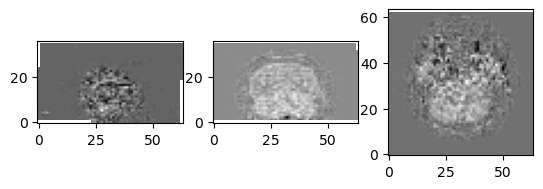

In [39]:
slices = [x_slice, y_slice, z_slice]

fig, axes = plt.subplots(1, len(slices))
for i, slice in enumerate(slices):
    axes[i].imshow(slice.T, cmap="gray", origin="lower")